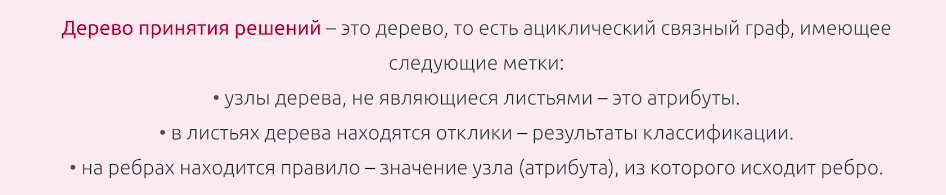

In [11]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [12]:
diabetes = pd.read_csv('diabetes.csv') 

In [13]:
task_diabets = diabetes.head(580)



Вывод числа строк в получившейся выборке и относящихся к классу 1 (пациент болен диабетом)


In [14]:
len(task_diabets[task_diabets['Outcome'] == 0])

380

In [15]:
task_diabets

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
575,1,119,44,47,63,35.5,0.280,25,0
576,6,108,44,20,130,24.0,0.813,35,0
577,2,118,80,0,0,42.9,0.693,21,1
578,10,133,68,0,0,27.0,0.245,36,0




Разделеные данных на тренировочные и тестовые. Первые 80% строк — тренировочные, остальные — тестовые.


In [16]:


train = task_diabets.head(int(len(task_diabets)*0.8))
test = task_diabets.tail(int(len(task_diabets)*0.2))



In [17]:


features = list(train.columns[:8])
x = train[features]
y = train['Outcome']



In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
tree = DecisionTreeClassifier(criterion='entropy', #критерий разделения
                              min_samples_leaf=15, #минимальное число объектов в листе
                              max_leaf_nodes=25, #максимальное число листьев
                              random_state=2020)
clf=tree.fit(x, y)



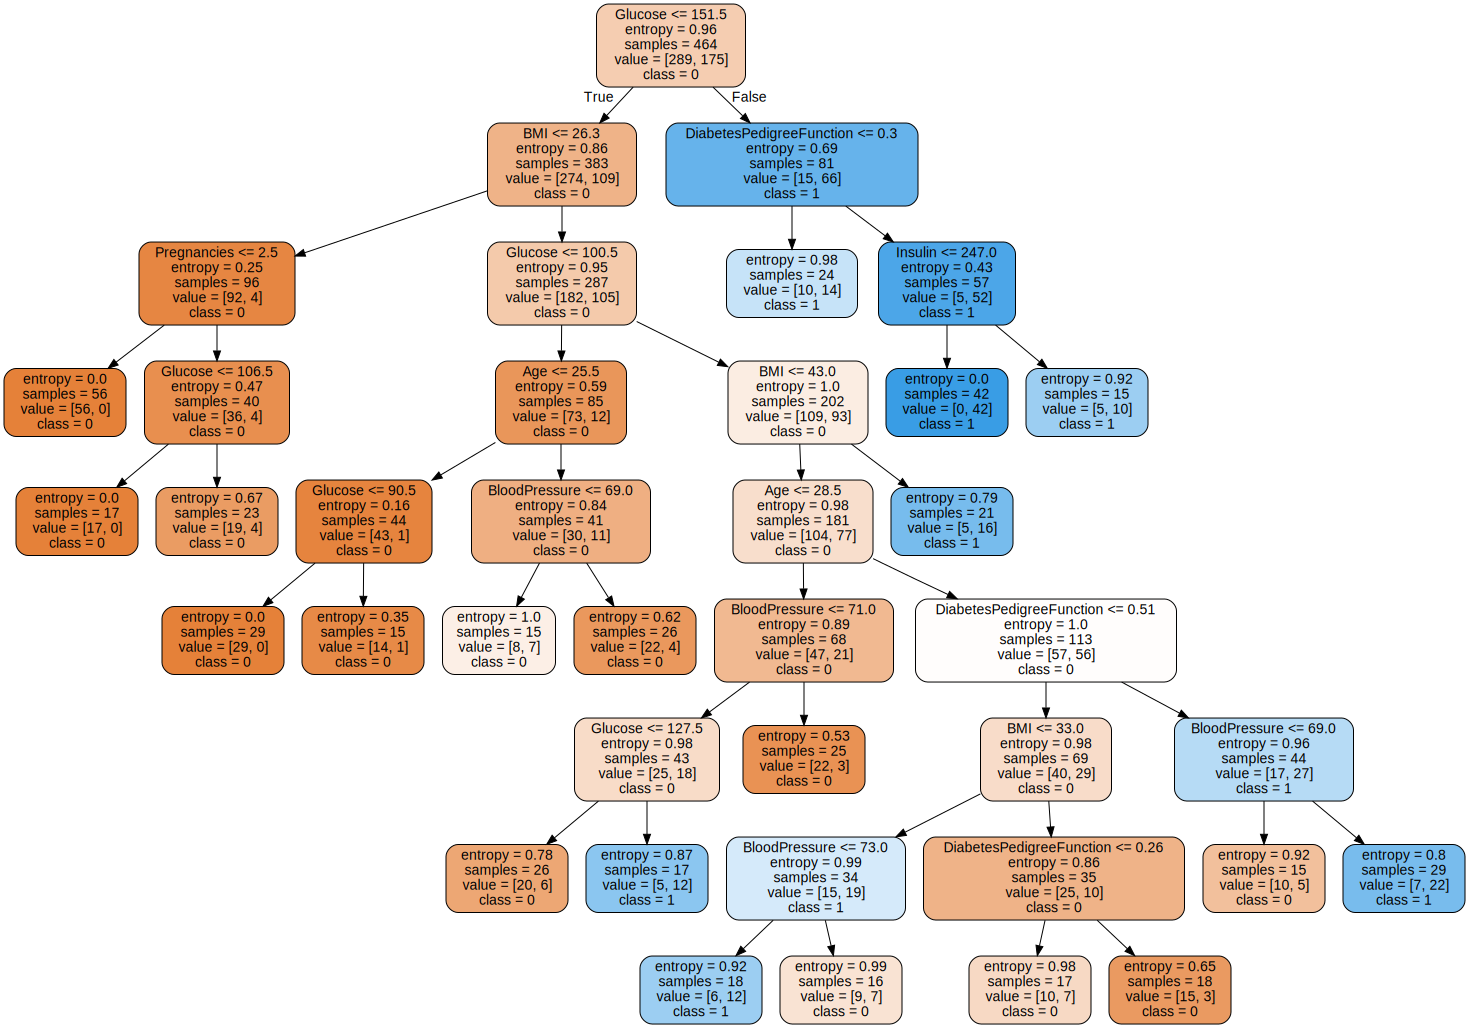

In [21]:


from sklearn.tree import export_graphviz
import graphviz
columns = list(x.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)



In [22]:
clf.tree_.max_depth

8

In [24]:


features = list(test.columns[:8])
x = test[features]
y_true = test['Outcome']
y_pred = clf.predict(x)



In [25]:


from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)


0.8017241379310345

In [26]:


from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro')



0.7325313283208019


 6. Предсказание для пациентов 749, 715, 718, 735 (указаны номера строк, нумерация с нуля) из начального набора данных. 
Выполним предсказание для конкретного объекта (с индексом 749) исходных данных:


In [28]:
diabetes.loc[749, features]

Pregnancies                   6.000
Glucose                     162.000
BloodPressure                62.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          24.300
DiabetesPedigreeFunction      0.178
Age                          50.000
Name: 749, dtype: float64

In [29]:
clf.predict([diabetes.loc[708, features].tolist()])[0]

1

In [30]:
clf.predict([diabetes.loc[715, features].tolist()])[0]

1

In [31]:
clf.predict([diabetes.loc[718, features].tolist()])[0]

0

In [32]:
clf.predict([diabetes.loc[735, features].tolist()])[0]

0

In [33]:
diabetes.loc[749, 'Outcome']

1